In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
telco_base_data=pd.read_csv('CustomerChurn.csv')

In [3]:
telco_base_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
telco_base_data.shape

(7043, 21)

In [6]:
telco_base_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [7]:
telco_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
telco_base_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


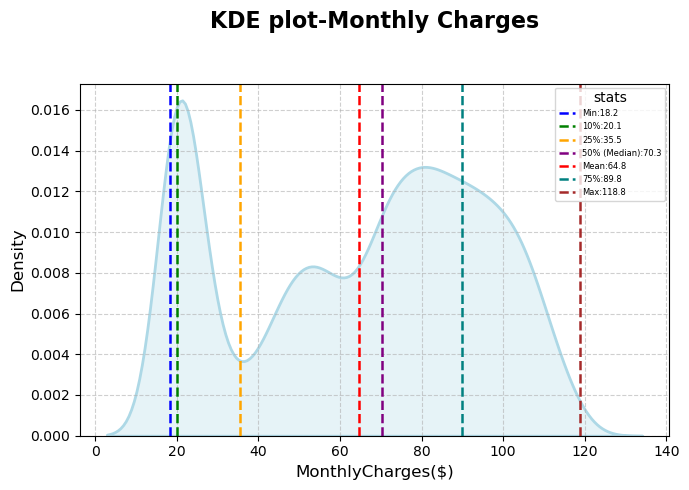

In [19]:
# Object Oriented Visual
fig,ax=plt.subplots(figsize=(7,5))
sns.kdeplot(telco_base_data['MonthlyCharges'],ax=ax,color='lightblue',fill=True,alpha=0.3,linewidth=2)

stats={
    'Min':('blue',telco_base_data['MonthlyCharges'].min()),
    '10%':('green',telco_base_data['MonthlyCharges'].quantile(0.10)),
    '25%':('orange',telco_base_data['MonthlyCharges'].quantile(0.25)),
    '50% (Median)':('purple',telco_base_data['MonthlyCharges'].median()),
    'Mean':('red',telco_base_data['MonthlyCharges'].mean()),
    '75%':('teal',telco_base_data['MonthlyCharges'].quantile(0.75)),
    'Max':('brown',telco_base_data['MonthlyCharges'].max())
}

for label,(color,val)in stats.items():
    ax.axvline(val,linestyle='--',color=color,linewidth=1.8,label=f'{label}:{val:.1f}')
ax.set_title('KDE plot-Monthly Charges',fontsize=16,weight='bold',pad=40)

ax.set_xlabel('MonthlyCharges($)',fontsize=12)
ax.set_ylabel('Density',fontsize=12)
ax.grid(True,linestyle='--',alpha=0.6)
ax.legend(loc='upper right',fontsize=6,title='stats')

plt.tight_layout()
plt.show()


In [20]:
# % of churn count
telco_base_data['Churn'].value_counts()*100/len(telco_base_data['Churn'])

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

In [21]:
telco_base_data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

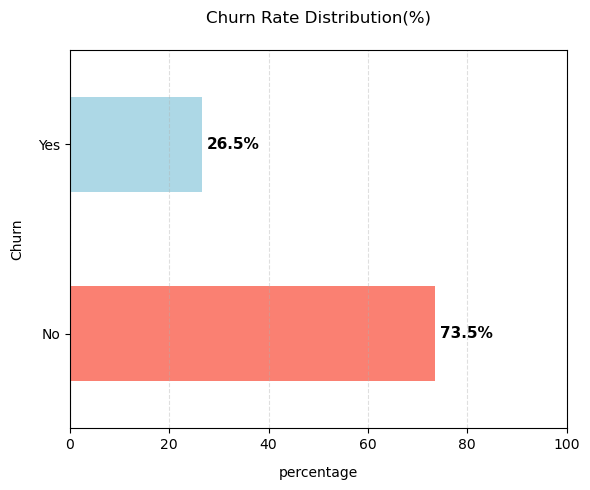

In [27]:
counts=telco_base_data['Churn'].value_counts()
percents=counts/counts.sum()*100
percents.plot(kind='barh',color=['salmon','lightblue'],figsize=(6,5))
for i,v in enumerate(percents):
    plt.text(v+1,i,f'{v:.1f}%',va='center',fontsize=11,fontweight='bold')
plt.xlabel('percentage',labelpad=10)
plt.ylabel('Churn',labelpad=10)
plt.title('Churn Rate Distribution(%)',pad=20)
plt.grid(axis='x',linestyle='--',alpha=0.4)
plt.xlim(0,100)
plt.tight_layout()
plt.show()
    

In [28]:
telco_base_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [29]:
telco_data=telco_base_data.copy()

In [30]:
telco_data.TotalCharges=pd.to_numeric(telco_data.TotalCharges,errors='coerce')
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [31]:
telco_data.dropna(how='any',inplace=True)
telco_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# Analysis

In [32]:
print(telco_data['tenure'].max())

72


In [33]:
#binning
labels=["{}-{}".format(i,i+11) for  i in range(1,72,12)]
telco_data['tenure_group']=pd.cut(telco_data.tenure,range(1,80,12),right=False,labels=labels)
telco_data['tenure_group'].value_counts()

tenure_group
1-12     2175
61-72    1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: count, dtype: int64

In [74]:
telco_data.head(3)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1-12


In [39]:
# telco_data.drop(columns=['tenure'],axis=1,inplace=True)

In [38]:
telco_data.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   gender            7032 non-null   object  
 2   SeniorCitizen     7032 non-null   int64   
 3   Partner           7032 non-null   object  
 4   Dependents        7032 non-null   object  
 5   PhoneService      7032 non-null   object  
 6   MultipleLines     7032 non-null   object  
 7   InternetService   7032 non-null   object  
 8   OnlineSecurity    7032 non-null   object  
 9   OnlineBackup      7032 non-null   object  
 10  DeviceProtection  7032 non-null   object  
 11  TechSupport       7032 non-null   object  
 12  StreamingTV       7032 non-null   object  
 13  StreamingMovies   7032 non-null   object  
 14  Contract          7032 non-null   object  
 15  PaperlessBilling  7032 non-null   object  
 16  PaymentMethod     7032 non-nu

In [ ]:
# perfoming Analysis

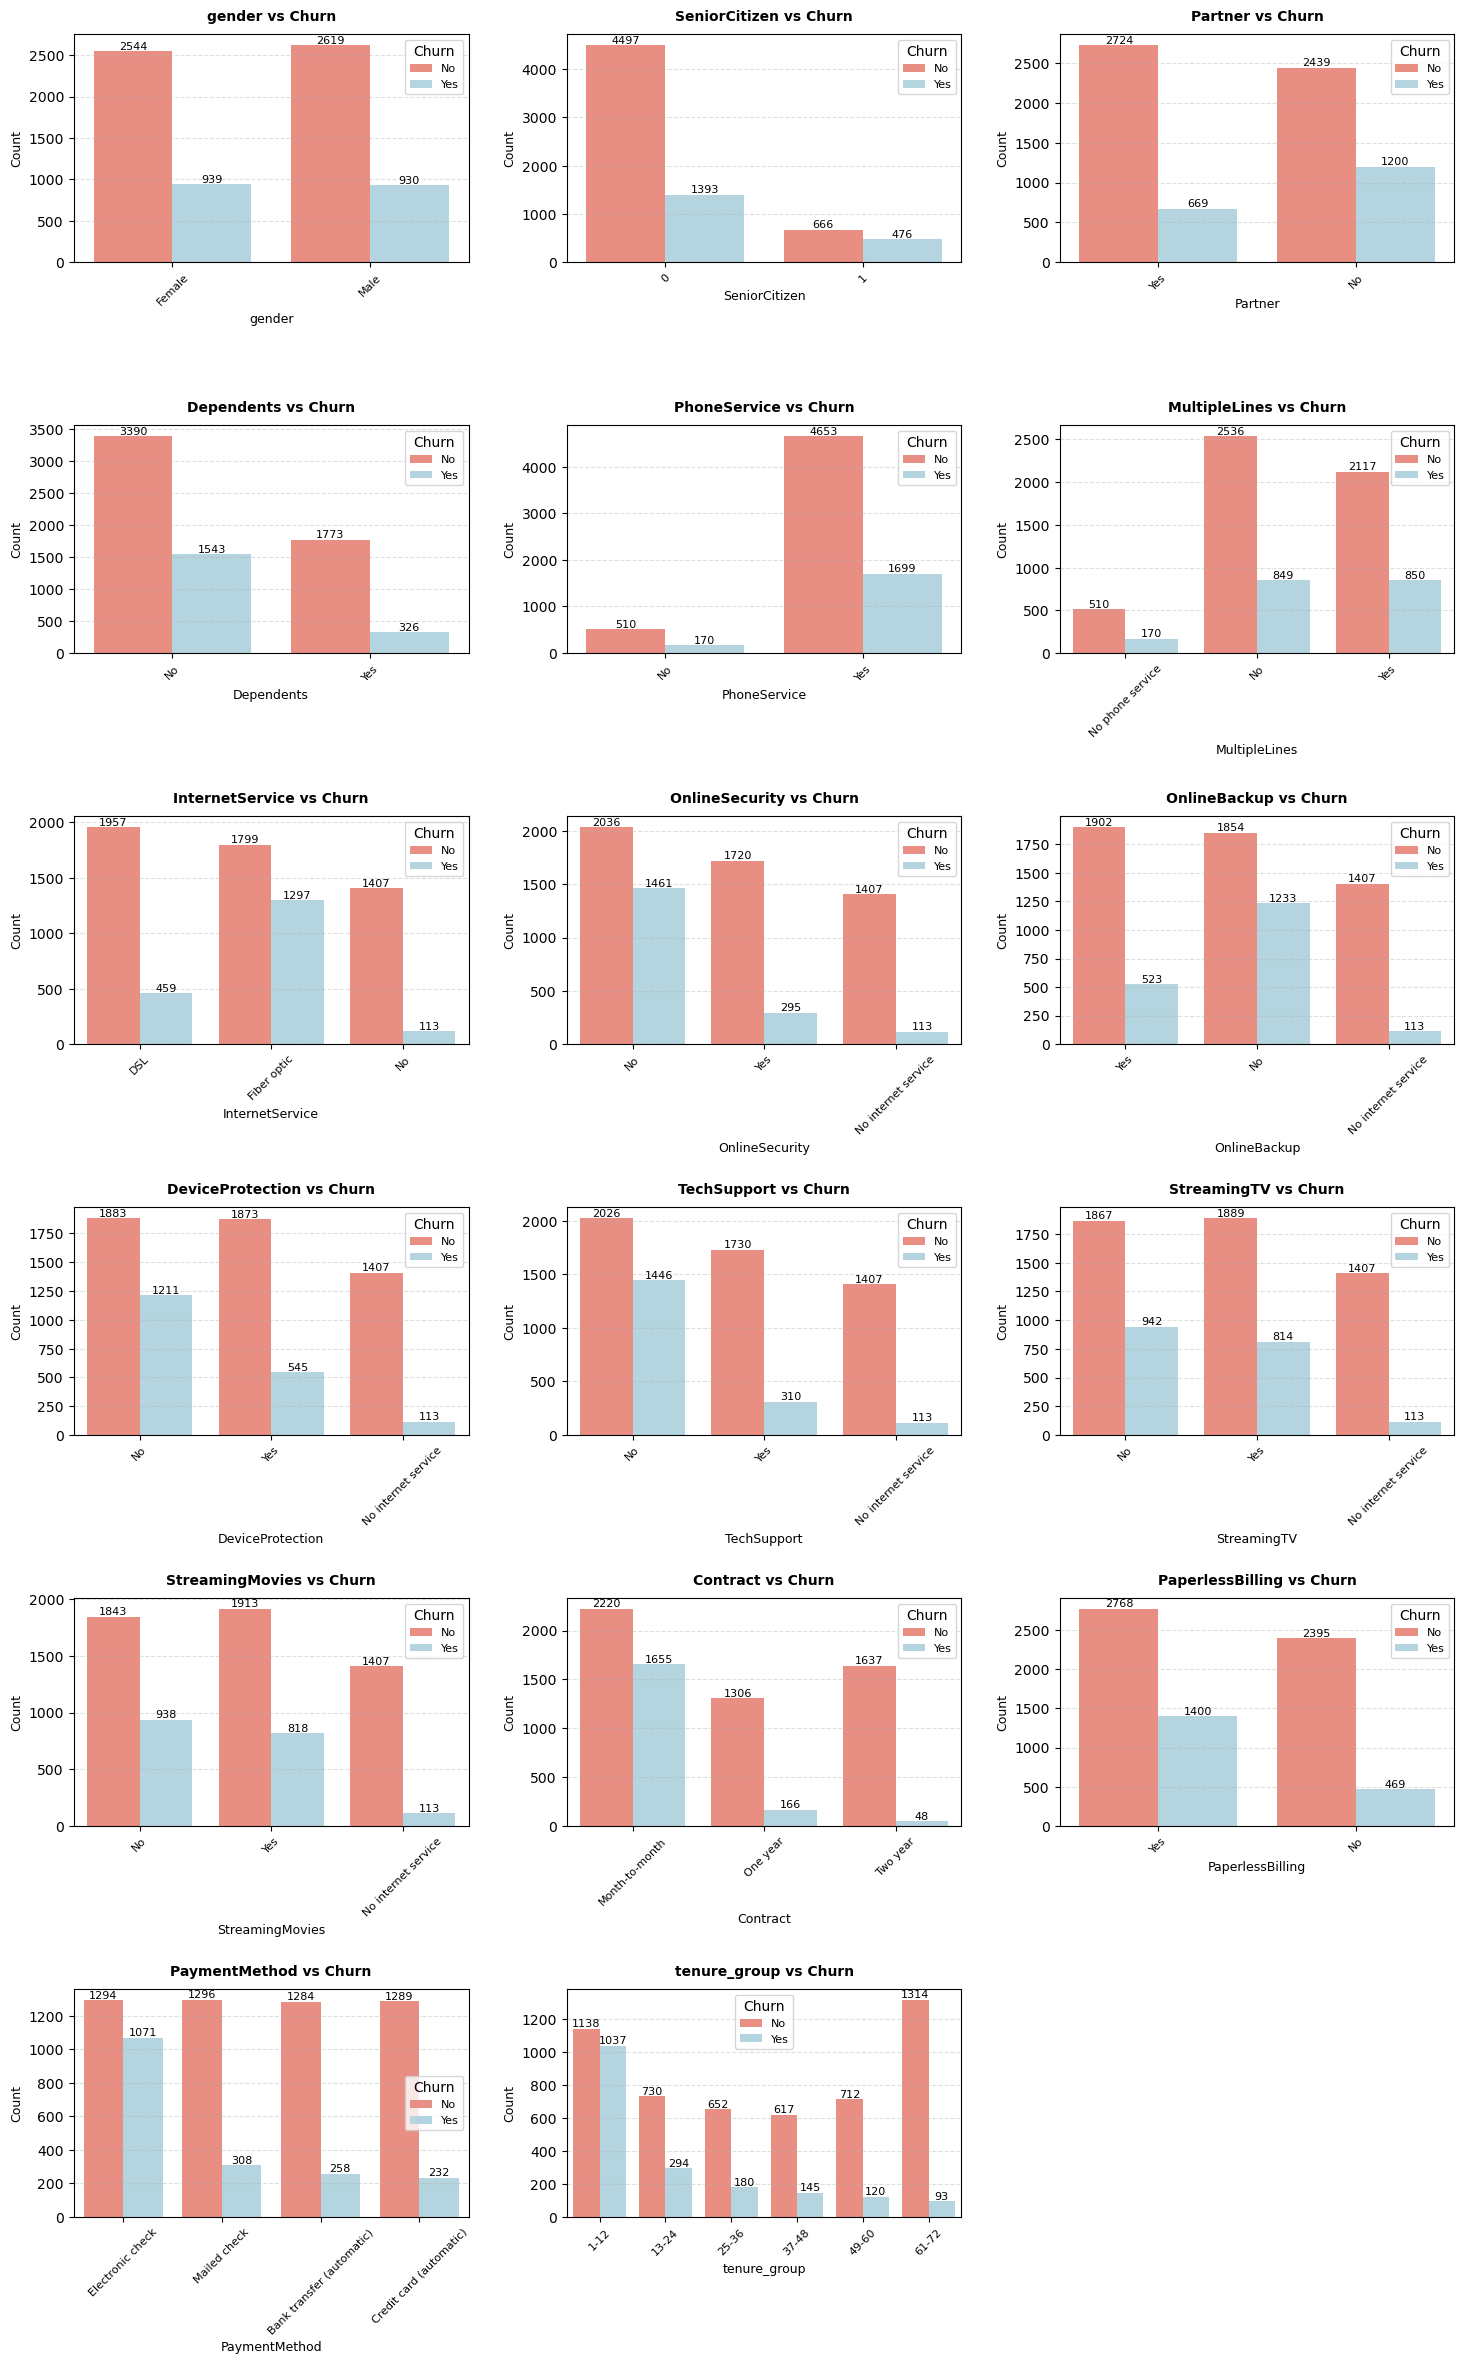

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

predictors = telco_data.drop(columns=['customerID','Churn','TotalCharges','MonthlyCharges']).columns

n_cols = 3
n_rows = (len(predictors) + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for i, predictor in enumerate(predictors):
    ax = axes[i]
    sns.countplot(data=telco_data, x=predictor, hue='Churn', ax=ax,
                  palette=['salmon', 'lightblue'])
    ax.set_title(f'{predictor} vs Churn', fontsize=10, weight='bold', pad=10)
    ax.set_xlabel(predictor, fontsize=9)
    ax.set_ylabel('Count', fontsize=9)
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    ax.grid(axis='y', linestyle='--', alpha=0.4)
    ax.legend(title='Churn', fontsize=8)

    # Add count labels above bars
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        (p.get_x() + p.get_width()/2., height),
                        ha='center', va='bottom', fontsize=8, color='black')

# Hide extra empty axes (if total plots < grid slots)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=2)
plt.show()


In [ ]:
 #Numerical Analysis

In [50]:
telco_data['Churn']=np.where(telco_data.Churn=='Yes',1,0)
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1-12
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1-12
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-48
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1-12


In [ ]:
telco_data.drop(columns=

In [52]:
telco_data.drop(columns=['customerID'],axis=1,inplace=True)
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1-12


In [54]:
telco_data_dummies=pd.get_dummies(telco_data)
telco_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


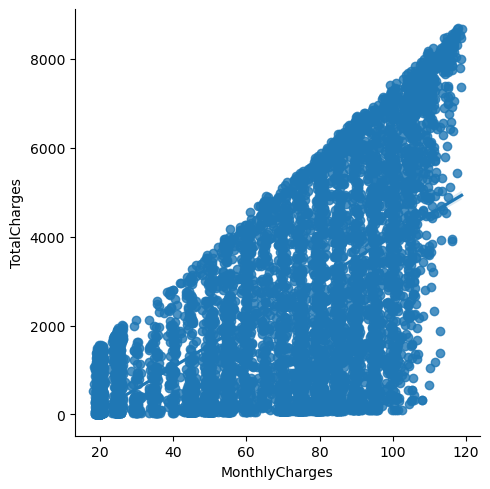

In [58]:
g=sns.lmplot(data=telco_data_dummies,x='MonthlyCharges',y='TotalCharges',fit_reg=True)
plt.show()

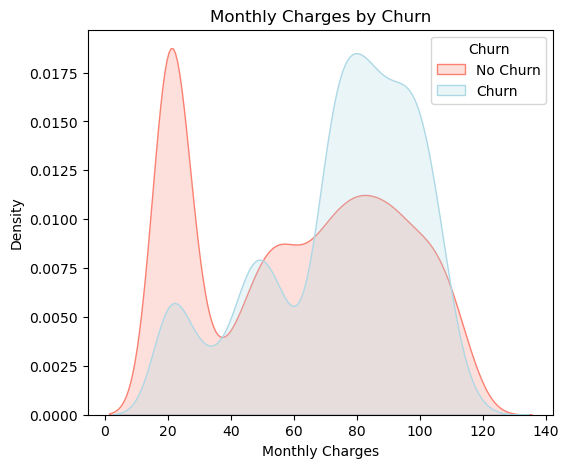

In [66]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.kdeplot(
    data=telco_data_dummies[telco_data_dummies['Churn'] == 0],
    x='MonthlyCharges',
    color='salmon',
    fill=True,
    label='No Churn',
    ax=ax
)
sns.kdeplot(
    data=telco_data_dummies[telco_data_dummies['Churn'] == 1],
    x='MonthlyCharges',
    color='lightblue',
    fill=True,
    label='Churn',
    ax=ax
)
ax.set_xlabel('Monthly Charges')
ax.set_ylabel('Density')
ax.set_title('Monthly Charges by Churn')
ax.legend(title='Churn', loc='upper right')
plt.show()



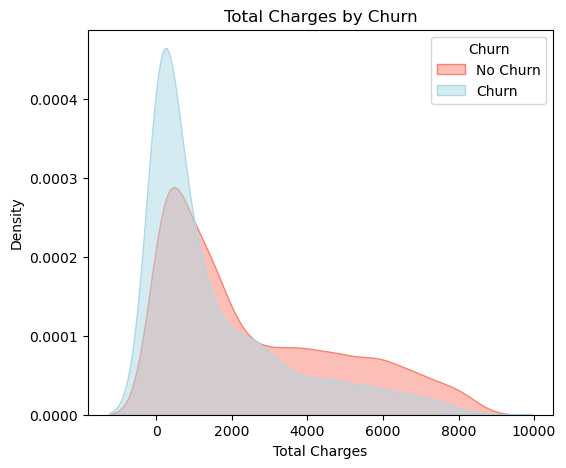

In [67]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.kdeplot(
    data=telco_data_dummies[telco_data_dummies['Churn'] == 0],
    x='TotalCharges',
    color='salmon',
    fill=True,
    label='No Churn',
    alpha=0.5,
    ax=ax
)
sns.kdeplot(
    data=telco_data_dummies[telco_data_dummies['Churn'] == 1],
    x='TotalCharges',
    color='lightblue',
    fill=True,
    label='Churn',
    alpha=0.5,
    ax=ax
)
ax.set_xlabel('Total Charges')
ax.set_ylabel('Density')
ax.set_title('Total Charges by Churn')
ax.legend(title='Churn', loc='upper right')
plt.show()


C:\Users\SANKEERTHANA\AppData\Local\Temp\ipykernel_11012\1063636754.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(churn_corr.index,rotation=45,ha='right',fontsize=15)


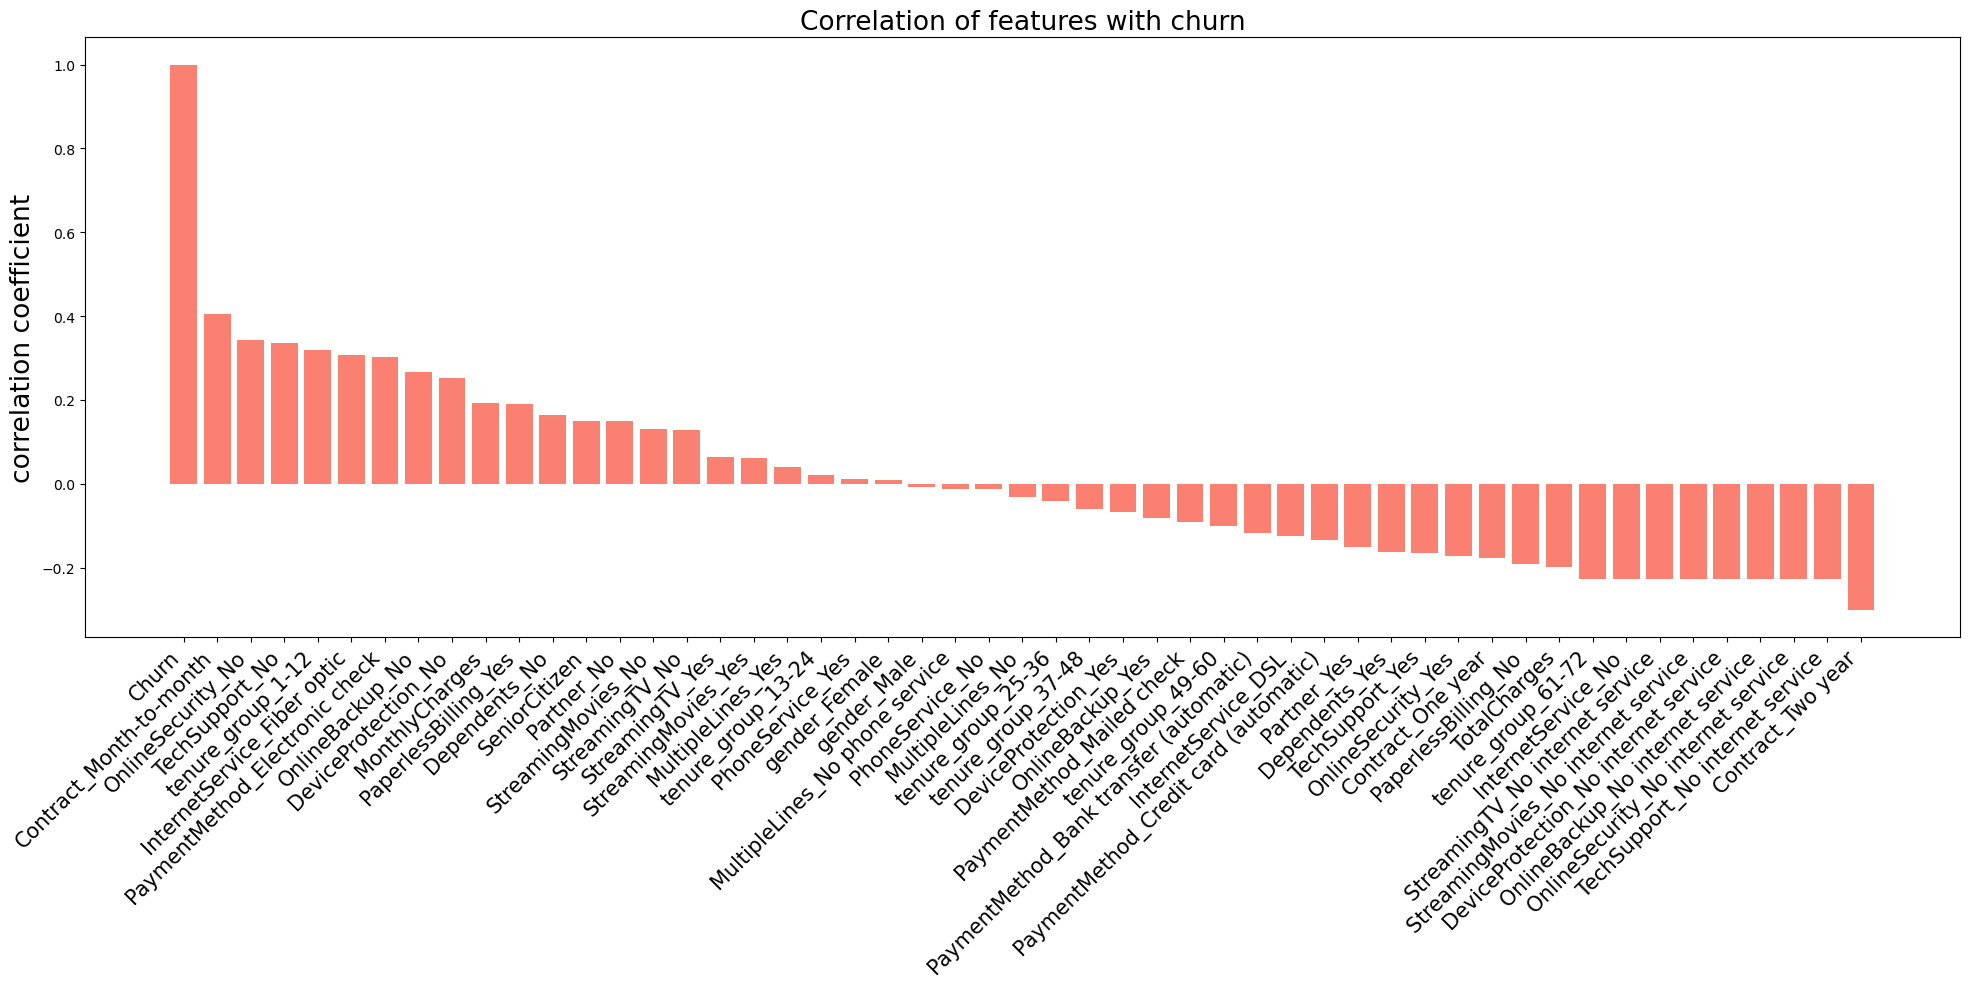

In [73]:
churn_corr=telco_data_dummies.corr(numeric_only=True)['Churn'].sort_values(ascending=False)
fig,ax=plt.subplots(figsize=(20,10))
ax.bar(churn_corr.index,churn_corr.values, color='salmon')
ax.set_title('Correlation of features with churn',fontsize=19)
ax.set_ylabel('correlation coefficient',fontsize=19)
ax.set_xticklabels(churn_corr.index,rotation=45,ha='right',fontsize=15)
plt.tight_layout()
plt.show()